<a href="https://colab.research.google.com/github/ChaituReddy17/Brain_Tumor_Classification/blob/main/Brain-Tumor-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
uploaded = files.upload()

Saving Brain_Tumor_Classification.zip to Brain_Tumor_Classification.zip


In [25]:
import zipfile
import os

with zipfile.ZipFile("Brain_Tumor_Classification.zip", 'r') as zip_ref:
    zip_ref.extractall("brain_tumor_dataset")  # extract to this folder

# Check contents
os.listdir("brain_tumor_dataset")


['Training', 'Testing']

In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [27]:
train_path = "brain_tumor_dataset/Training"
test_path = "brain_tumor_dataset/Testing"

import os
print("Train Subfolders:", os.listdir(train_path))
print("Test Subfolders:", os.listdir(test_path))

categories = ['glioma', 'notumor', 'pituitary', 'meningioma']
IMG_SIZE = 100

Train Subfolders: ['notumor', 'meningioma', 'pituitary', 'glioma']
Test Subfolders: ['notumor', 'meningioma', 'pituitary', 'glioma']


In [28]:
def load_data(path):
    data = []
    labels = []
    for idx, folder in enumerate(categories):
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append(img)
                labels.append(idx)
            except Exception as e:
                pass
    return np.array(data), np.array(labels)

X_train_raw, y_train = load_data(train_path)
X_test_raw, y_test = load_data(test_path)


In [29]:
X_train = X_train_raw.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
X_test = X_test_raw.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

In [30]:
X_train = X_train_raw.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
X_test = X_test_raw.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

# Model (Vanilla CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Training
history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat))

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 452ms/step - accuracy: 0.5920 - loss: 0.9628 - val_accuracy: 0.7979 - val_loss: 0.4863
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 443ms/step - accuracy: 0.8509 - loss: 0.4071 - val_accuracy: 0.7803 - val_loss: 0.4938
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 433ms/step - accuracy: 0.8754 - loss: 0.3276 - val_accuracy: 0.8726 - val_loss: 0.2950
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 450ms/step - accuracy: 0.9018 - loss: 0.2584 - val_accuracy: 0.8978 - val_loss: 0.2639
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 428ms/step - accuracy: 0.9382 - loss: 0.1660 - val_accuracy: 0.9169 - val_loss: 0.2013
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 85s 447ms/step - accuracy: 0.9458 - loss: 0.1398 - val_accuracy: 0.9405 - val_loss: 0.1821
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 467ms/step - accuracy: 0.9563 - loss: 0.1227 - val_accuracy: 0.9260 - val_loss: 0.2034
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 478ms/step - accuracy: 0.9670 - loss: 

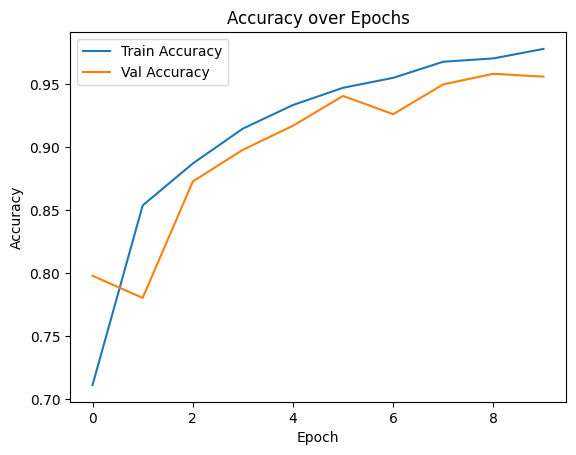

In [32]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

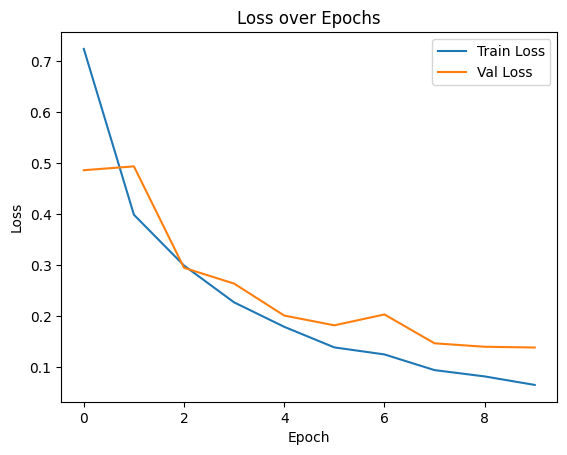

In [33]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# Evaluating
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=categories))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.90      0.94       300
     notumor       0.96      1.00      0.98       405
   pituitary       1.00      0.99      1.00       300
  meningioma       0.89      0.92      0.91       306

    accuracy                           0.96      1311
   macro avg       0.96      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311

Confusion Matrix:
[[270   0   0  30]
 [  0 404   0   1]
 [  0   0 298   2]
 [  7  18   0 281]]
